In [2]:
#important library we need
import pandas as pd  ##--- for data manipulations##
import matplotlib.pyplot as plt  ##--- for plotting graphs##
import numpy as np ## for numerical calculations##

In [3]:
# load data
df_training= pd.read_csv("/content/twitter_training.csv")
df_validation = pd.read_csv("/content/twitter_validation.csv")

In [7]:
# Names for columns in the dataframe
column_name=['tweetID','entity','sentiment','tweet_content']
df_training.columns=column_name
df_validation.columns=column_name

In [8]:
df=pd.concat([df_training,df_validation],ignore_index=False)

In [9]:
df.head()

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [12]:
df.isnull().sum() ## checking for null values#

tweetID          0
entity           0
sentiment        0
tweet_content    0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.duplicated().sum() ## checkinf for duplicate values#

2856

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72138 entries, 0 to 995
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweetID        72138 non-null  int64 
 1   entity         72138 non-null  object
 2   sentiment      72138 non-null  object
 3   tweet_content  72138 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [21]:
# Calculate the number of sentiment labels in training data and validation data
train_sentiment_counts = df_training['sentiment'].value_counts()
valid_sentiment_counts = df_validation['sentiment'].value_counts()

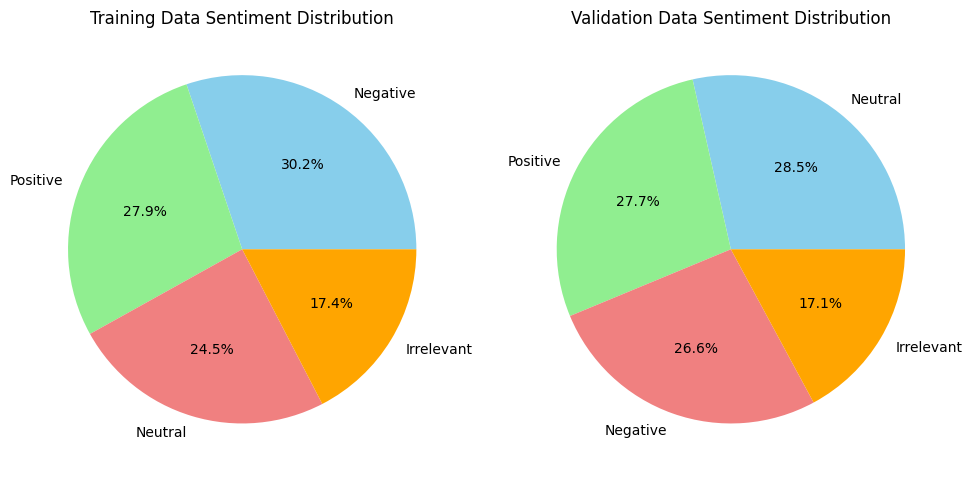

In [22]:
# Draw a pie chart for the training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(train_sentiment_counts, labels=train_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Training Data Sentiment Distribution')

# Draw a pie chart for the valid data
plt.subplot(1, 2, 2)
plt.pie(valid_sentiment_counts, labels=valid_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Validation Data Sentiment Distribution')

plt.tight_layout()
plt.show()

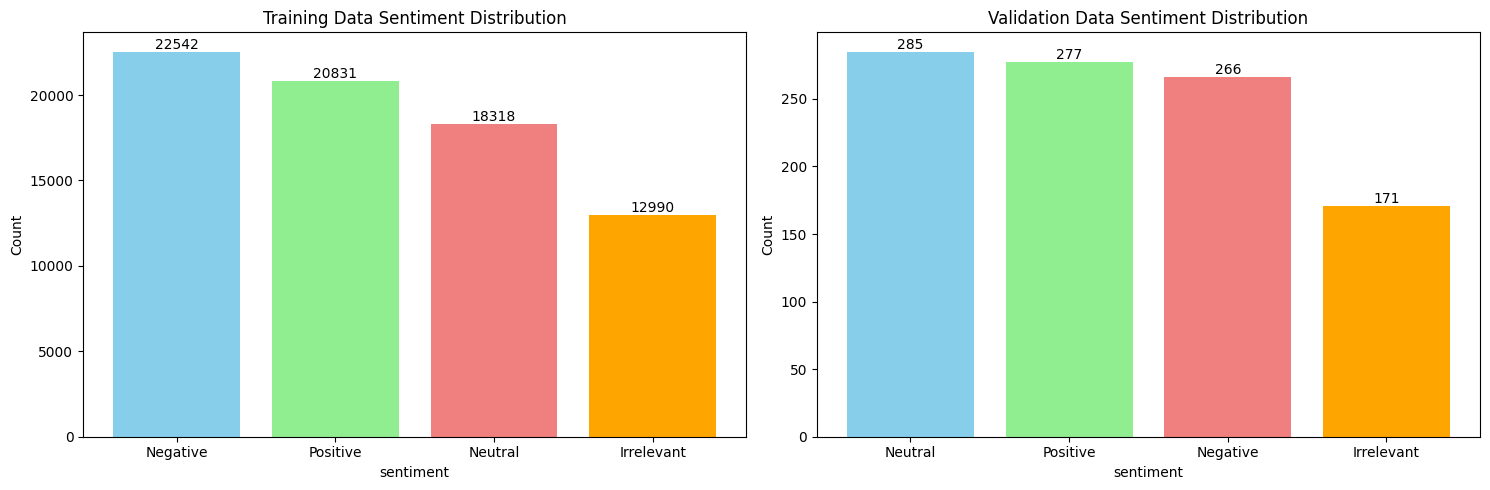

In [24]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(train_sentiment_counts.index, train_sentiment_counts.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Training Data Sentiment Distribution')
plt.xlabel('sentiment')
plt.ylabel('Count')

# Display quantity in each column
for i, count in enumerate(train_sentiment_counts.values):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')


plt.subplot(1, 2, 2)
plt.bar(valid_sentiment_counts.index, valid_sentiment_counts.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Validation Data Sentiment Distribution')
plt.xlabel('sentiment')
plt.ylabel('Count')
# Display quantity in each column
for i, count in enumerate(valid_sentiment_counts.values):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [25]:
# Get the column 'content' and assign it to an array
train_sentences = df_training['tweet_content'].to_numpy()
valid_sentences = df_validation['tweet_content'].to_numpy()

# Convert the label value to the corresponding number
label_mapping = {'Positive': 0, 'Negative': 1,'Neutral' : 2,'Irrelevant': 3,}
train_label = df_training['sentiment'].map(label_mapping)
valid_label = df_validation['sentiment'].map(label_mapping)

In [26]:
print(train_sentences)

['I am coming to the borders and I will kill you all,'
 'im getting on borderlands and i will kill you all,'
 'im coming on borderlands and i will murder you all,' ...
 'Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice'
 'Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice'
 'Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice']


In [27]:
train_label

0        0
1        0
2        0
3        0
4        0
        ..
74676    0
74677    0
74678    0
74679    0
74680    0
Name: sentiment, Length: 74681, dtype: int64

In [28]:
print(valid_sentences[:10])  # Show the first 10 elements of the array
valid_label

["BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…"
 '@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄'
 "CSGO matchmaking is so full of closet hacking, it's a truly awful game."
 'Now the President is slapping Americans in the face that he really did commit an unlawful act after his  acquittal! From Discover on Google vanityfair.com/news/2020/02/t…'
 'Hi @EAHelp I’ve had Madeleine McCann in my cellar for the past 13 years and the little sneaky thing just escaped whilst I was loading up some fifa points, she took my card and I’m having to use my paypal account but it isn’t working, can you help me resolve it please?'
 'Thank you @EAMaddenNFL!! \n\nNew TE Austin Hooper in the ORANGE & BROWN!! \n\n#Browns | @AustinHooper18 \n\n pic.twitter.com/GRg4xzFKOn'
 'Rocket League, Sea of Thieves or Rainbow Six: Siege🤔? I love playing all three on stream but which is the best? #stream #twitch #R

0      2
1      1
2      1
3      2
4      1
      ..
994    3
995    3
996    0
997    0
998    2
Name: sentiment, Length: 999, dtype: int64

In [30]:
!pip install clean-text ### Delete Emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=a45b39220fda123bbe81d160ad64ca73ca6571a095feba0188a6b3514a0e27b4
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [31]:
from cleantext import clean

In [32]:
# Create an array to store sentences that remove emojis
remove_emoji_train_sentences = []
remove_emoji_valid_sentences = []

# Process and add sentences to the processed list
for sentence in train_sentences:
    remove_emoji_train_sentences.append(clean(sentence, no_emoji=True))

for sentence in valid_sentences:
    remove_emoji_valid_sentences.append(clean(sentence, no_emoji=True))

In [33]:
print(remove_emoji_train_sentences[:10])
print(remove_emoji_valid_sentences[:10])

['i am coming to the borders and i will kill you all,', 'im getting on borderlands and i will kill you all,', 'im coming on borderlands and i will murder you all,', 'im getting on borderlands 2 and i will murder you me all,', 'im getting into borderlands and i can murder you all,', "so i spent a few hours making something for fun. . . if you don't know i am a huge @borderlands fan and maya is one of my favorite characters. so i decided to make myself a wallpaper for my pc. . here is the original image versus the creation i made :) enjoy! pic.twitter.com/mlsi5wf9jg", "so i spent a couple of hours doing something for fun... if you don't know that i'm a huge @ borderlands fan and maya is one of my favorite characters, i decided to make a wallpaper for my pc.. here's the original picture compared to the creation i made:) have fun! pic.twitter.com / mlsi5wf9jg", "so i spent a few hours doing something for fun... if you don't know i'm a huge @ borderlands fan and maya is one of my favorite c

In [34]:
from sklearn.preprocessing import LabelBinarizer

In [35]:
#Converted our labels to one-hot-encoding values. Ex : 1 ----->[0,1,0,0,0,0,0,0,0,0]
lb = LabelBinarizer()

In [36]:
train_label = lb.fit_transform(train_label)
valid_label = lb.fit_transform(valid_label)

In [37]:
print(train_label[0])

[1 0 0 0]


In [38]:
### Create Vocabulary###

vocabulary_size = 10000

embedding_dim = 64

max_length_sentence = 150

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
tokenizer = Tokenizer(num_words=vocabulary_size , oov_token = 'OOV', lower = True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

In [41]:
tokenizer.fit_on_texts(remove_emoji_train_sentences)

In [42]:
# If you want to display both you can use this syntax : tokenizer.word_index
print(list(tokenizer.word_index.items())[:50])  # Display the first 10 key-value pairs

[('OOV', 1), ('the', 2), ('i', 3), ('to', 4), ('and', 5), ('a', 6), ('of', 7), ('is', 8), ('in', 9), ('for', 10), ('this', 11), ('it', 12), ('you', 13), ('on', 14), ('my', 15), ('that', 16), ('com', 17), ('with', 18), ('game', 19), ('so', 20), ('be', 21), ('me', 22), ('have', 23), ('just', 24), ('but', 25), ('not', 26), ('are', 27), ('all', 28), ('at', 29), ('was', 30), ('like', 31), ('out', 32), ('2', 33), ('from', 34), ('your', 35), ("i'm", 36), ('pic', 37), ('twitter', 38), ('now', 39), ('get', 40), ('we', 41), ('as', 42), ('they', 43), ('if', 44), ('has', 45), ('one', 46), ('t', 47), ('do', 48), ('good', 49), ('about', 50)]


In [43]:
remove_emoji_train_sentences = tokenizer.texts_to_sequences(remove_emoji_train_sentences)  ###Converts sentences from text to numeric strings, based on the previously created vocabulary dictionary.¶

In [45]:
padding_train_sentences = pad_sequences(remove_emoji_train_sentences, maxlen=max_length_sentence,truncating='post',padding='post')

In [46]:
padding_train_sentences

array([[   3,  123,  405, ...,    0,    0,    0],
       [ 307,  176,   14, ...,    0,    0,    0],
       [ 307,  405,   14, ...,    0,    0,    0],
       ...,
       [  24, 1961,    2, ...,    0,    0,    0],
       [  24, 1961,  743, ...,    0,    0,    0],
       [  24,   31,    2, ...,    0,    0,    0]], dtype=int32)

In [47]:
padding_train_sentences.shape

(74681, 150)

In [48]:
remove_emoji_valid_sentences = tokenizer.texts_to_sequences(remove_emoji_valid_sentences)
padding_valid_sentences = pad_sequences(remove_emoji_valid_sentences, maxlen=max_length_sentence,truncating='post',padding='post')

In [49]:
padding_valid_sentences.shape

(999, 150)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Flatten,Dense

In [51]:
model = Sequential()

model.add(Embedding(vocabulary_size,embedding_dim,input_length=max_length_sentence))

model.add(Flatten())

model.add(Dense(10,activation='relu'))

model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense (Dense)               (None, 10)                96010     
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 736054 (2.81 MB)
Trainable params: 736054 (2.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
print('Building model.................')
history = model.fit(padding_train_sentences,train_label,epochs=20,validation_data=(padding_valid_sentences,valid_label))
print('Success!!!!!!!!!!!!!!!!!!!!!!!!')

Building model.................
Epoch 1/20
2334/2334 [==============================] - 31s 12ms/step - loss: 0.9078 - accuracy: 0.6130 - val_loss: 0.2472 - val_accuracy: 0.9259
Epoch 2/20
2334/2334 [==============================] - 27s 12ms/step - loss: 0.3125 - accuracy: 0.8853 - val_loss: 0.0987 - val_accuracy: 0.9710
Epoch 3/20
2334/2334 [==============================] - 29s 13ms/step - loss: 0.1758 - accuracy: 0.9337 - val_loss: 0.0903 - val_accuracy: 0.9710
Epoch 4/20
2334/2334 [==============================] - 28s 12ms/step - loss: 0.1310 - accuracy: 0.9487 - val_loss: 0.0880 - val_accuracy: 0.9770
Epoch 5/20
2334/2334 [==============================] - 26s 11ms/step - loss: 0.1127 - accuracy: 0.9539 - val_loss: 0.1069 - val_accuracy: 0.9750
Epoch 6/20
2334/2334 [==============================] - 28s 12ms/step - loss: 0.1026 - accuracy: 0.9572 - val_loss: 0.1034 - val_accuracy: 0.9760
Epoch 7/20
2334/2334 [==============================] - 28s 12ms/step - loss: 0.0954 - accur

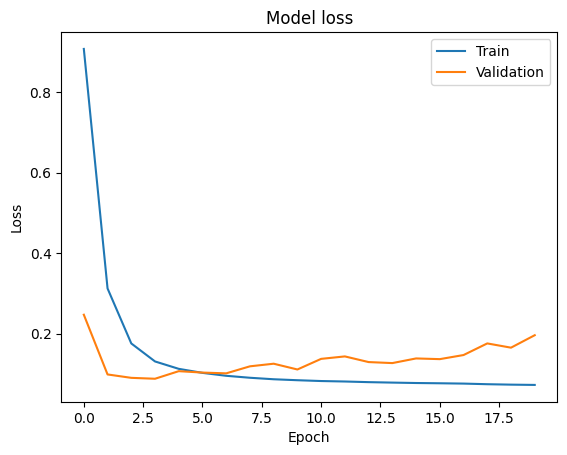

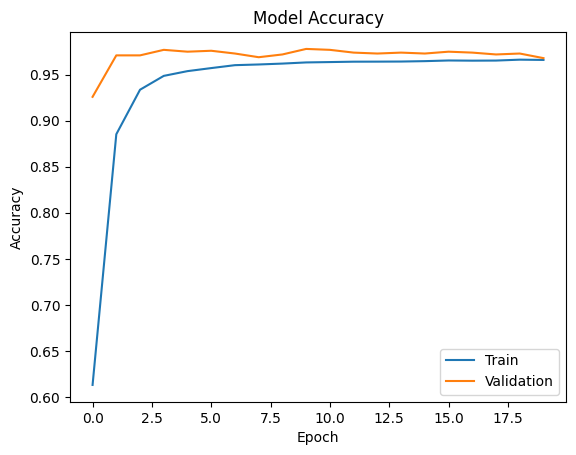

In [54]:
# Plot the loss of training and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


# Plot the accuracy of training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()